In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [7]:
dataset = pd.read_csv('database/raw_master_combined_data.csv')
print(dataset.shape)
dataset.head()

(2188, 16)


,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,RA,SN,TS,FG,PM2.5
0,2013-01-01 00:00:00,8.9,15,5,-,93,0,0.5,4.8,11.1,-,NaN,NaN,NaN,o,284.795833
1,2013-01-02 00:00:00,9.2,-,4,-,97,0,0.5,9.4,16.5,-,NaN,NaN,NaN,o,239.695455
2,2013-01-03 00:00:00,6.6,10,3,-,99,0,0.6,8.1,13,-,NaN,NaN,NaN,o,182.187500
3,2013-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,o,197.635714
4,2013-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,o,NaN


### Converting the complete dataset vals str->float

In [8]:
def convert(x):
    try:
        return float(x)
    except:
        return np.nan
    
for f in dataset.columns:
    dataset[f] = dataset[f].apply(convert)

## Handling Null Values

#### Deleting all the samples with NaN value of Target Feature (PM2.5)

In [9]:
data = dataset.copy()

data.dropna(subset=['PM2.5'], inplace=True)

def find_na_percent(): return data.isnull().sum()/len(data)*100

percentages = find_na_percent()
percentages

Day      100.000000
T         49.006623
TM        49.101230
Tm        49.006623
SLP       99.763482
H         49.006623
PP        53.595080
VV        49.006623
V         49.006623
VM        49.053926
VG        85.998108
RA       100.000000
SN       100.000000
TS       100.000000
FG       100.000000
PM2.5      0.000000
dtype: float64

### Removing features having Nan Percentage greater that THRESHOLD

In [10]:
THRESHOLD = 60

useless_features = [f for f in percentages.index if percentages[f]>THRESHOLD] + ['Day'] # We don't need this feature

data = data.drop(columns=useless_features)
data.index = range(len(data))
data.head()

,T,TM,Tm,H,PP,VV,V,VM,PM2.5
0,8.9,15.0,5.0,93.0,0.0,0.5,4.8,11.1,284.795833
1,9.2,NaN,4.0,97.0,0.0,0.5,9.4,16.5,239.695455
2,6.6,10.0,3.0,99.0,0.0,0.6,8.1,13.0,182.187500
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197.635714
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,297.100000


### Analyzing the datapoints of the features

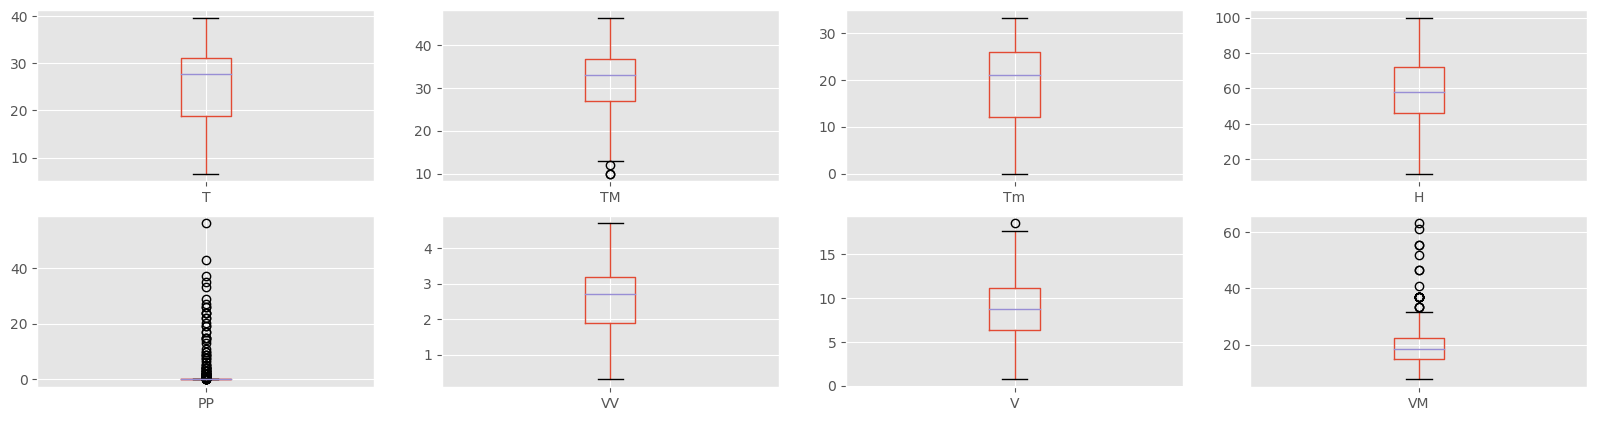

In [11]:
plt.figure(figsize=(20, 5), dpi=100)
for idx, f in enumerate(data.columns[:-1]):
    
    plt.subplot(2, 4, idx+1)
    data[f].plot(kind='box')
    plt.grid(1)

As we can see:
* PP and VM has a lot of outliers

Thus, we'll replace the NaN values of PP and VM with **MEDIAN** and others with **MEAN**

### Replacing NaN Values

In [12]:
for f in data.columns:
    if f in ['PP', 'VM']:
        data[f] = np.where(data[f].isnull(), data[f].median(), data[f])   # data.fillna(data[x].mean(), inplace=True))
    else:
        data[f] = np.where(data[f].isnull(), data[f].mean(), data[f])


In [13]:
find_na_percent()

T        0.0
TM       0.0
Tm       0.0
H        0.0
PP       0.0
VV       0.0
V        0.0
VM       0.0
PM2.5    0.0
dtype: float64

In [18]:
isNull = pd.DataFrame()

for f in data.columns:
    isNull[f'{f}_isNull'] = np.where(data[f].isnull(), False, True)

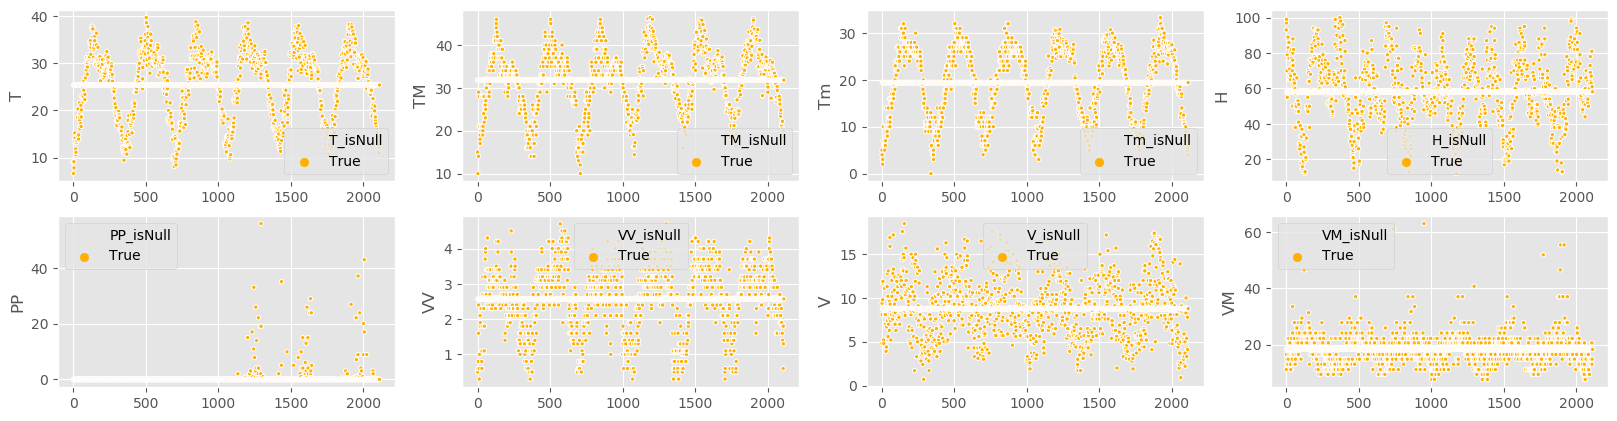

In [22]:
plt.figure(figsize=(20, 5), dpi=100)
for idx, f in enumerate(data.columns[:-1]):
    
    plt.subplot(2, 4, idx+1)
    sns.scatterplot(x=data.index, y=f, data=pd.concat([data, isNull], axis=1), hue=f'{f}_isNull', s=10, palette='prism_r')
    plt.grid(1)

# Normalize

In [23]:
from sklearn.preprocessing import MinMaxScaler

features = data.drop(columns=['PM2.5'])
target   = data['PM2.5']

scale = MinMaxScaler()
features = pd.DataFrame(scale.fit_transform(features))

In [24]:
features

,0,1,2,3,4,5,6,7
0,0.069486,0.137363,0.150150,0.920455,0.0,0.045455,0.230337,0.063177
1,0.078550,0.599394,0.120120,0.965909,0.0,0.045455,0.488764,0.160650
2,0.000000,0.000000,0.090090,0.988636,0.0,0.068182,0.415730,0.097473
3,0.567670,0.599394,0.583262,0.524656,0.0,0.516529,0.454327,0.193141
4,0.567670,0.599394,0.583262,0.524656,0.0,0.516529,0.454327,0.193141
...,...,...,...,...,...,...,...,...
2109,0.166163,0.280220,0.120120,0.556818,0.0,0.340909,0.191011,0.097473
2110,0.184290,0.274725,0.165165,0.556818,0.0,0.227273,0.449438,0.129964
2111,0.567670,0.599394,0.583262,0.524656,0.0,0.516529,0.454327,0.193141
2112,0.567670,0.599394,0.583262,0.524656,0.0,0.516529,0.454327,0.193141


# Splitting the Dataset

In [25]:
from sklearn.model_selection import train_test_split as tts

In [46]:
X_train, X_test, y_train, y_test = tts(features, target, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1691, 8) (423, 8) (1691,) (423,)


# Training

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [48]:
predictions = {}

#### Linear Regression

In [49]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
predictions['lr'] = lr_model.predict(X_test)

mse = mean_squared_error(y_test, predictions['lr'])
r2  = r2_score(y_test, predictions['lr'])

print(mse, r2)

5389.185076791887 0.2511988912807199


#### Decision Tree

In [58]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
predictions['dt'] = dt_model.predict(X_test)

mse = mean_squared_error(y_test, predictions['dt'])
r2  = r2_score(y_test, predictions['dt'])

print(mse, r2)

7119.802192404715 0.01073804303112258


#### Random Forest

In [51]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
predictions['rf'] = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predictions['rf'])
r2  = r2_score(y_test, predictions['rf'])

print(mse, r2)

5358.722189056582 0.2554315616726165


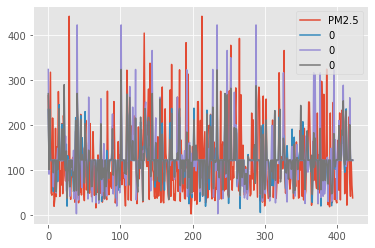

In [63]:
# plt.figure(figsize=(30, 10))
pd.concat([y_test, pd.DataFrame(predictions['lr']), pd.DataFrame(predictions['dt']), pd.DataFrame(predictions['rf'])], axis=1).plot()

In [60]:
y_test.index=range(len(y_test))
y_test

0      264.916667
1       94.750000
2      214.125000
3      317.000000
4       48.416667
          ...    
418     70.062500
419     41.200000
420    118.500000
421     65.458333
422     37.708333
Name: PM2.5, Length: 423, dtype: float64